# Final Project

1. (DONE)What is/are the most popular videos
2. (DONE)What is/are the most popular channels
3. (DONE)Plot Time series chart of all views
4. (DONE)Which youtube categories are the most popular
5. (DONE) Average time it takes a video to trend since publish time
6. Find if there's any correlation between views and comments and likes or any combination of them
6. Try to find features that make a video popular, X: title(caps?), channel, video category, time video is posted, tags, description. y = total_engagement -> p value/t test to determine most significant predictors?
- Define total_engagement: views + likes + dislikes + comments
8. can try to predict likes or like ratio or comments etc, or can try to do this by category
- Can try to predict category based on features
9. (DONE)Average views per video from a certain category
10. Distribution of video categories over time?
- MAKE SURE TO ADD EXTERNAL LINKS TO HELP GET UNEDUCATED READERS UP TO SPEED
- GOAL: WHAT DETERMINES IF A YOUTUBE VIDEO WILL TREND?
- (DONE)Can also do a pie chart of youtube videos by category to show which category trending videos come from
- (DONE) Can also do a pie chart to show the number of views from each category
- Do some feature engineering for title length and number of tags?
- Maybe calculate time a video spends trending

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import matplotlib
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# from sklearn import metrics
from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from functools import partial
to_datetime_fmt = partial(pd.to_datetime, format='%Y.%d.%m')

In [2]:
yt_videos = pd.read_csv('USvideos.csv')

# Remove all Nan rows
yt_videos = yt_videos.dropna()

# Remove repeat videos but keep the one that has the most views
yt_videos = yt_videos.sort_values('views', ascending=False).drop_duplicates('video_id').sort_index()

# Convert the trending_date column to a datetime object for easier use
yt_videos['trending_date'] = '20' + yt_videos['trending_date'].astype(str)
yt_videos['trending_date'] = yt_videos['trending_date'].apply(to_datetime_fmt)

yt_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,2017-11-10T12:04:17.000Z,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


===== EDA: Find 5 most viewed Youtube Videos =====
The most viewed video on Youtube is "This is America" by ChildishGambinoVEVO with 225,211,923 views. The second most viewed video is "YouTube Rewind 2017" by YouTube Spotlight with 149,376,127 views. The third most viewed video is "No Tears Left To Cry" by Ariana Grande.

In [3]:
most_viewed_videos = yt_videos.nlargest(3, ['views'])
most_viewed_videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
34708,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...


===== EDA: Find 3 most viewed Youtube Channels =====
The most viewed channel on Youtube is ibighit with 271,753,404 views. The second most viewed channel is ChildishGambinoVEVO with 225,211,923 views. The third most viewed channel is Dude Perfect with 206,044,429 views.

In [4]:
unique_channels = {k:0 for k in yt_videos['channel_title']}

for index, row in yt_videos.iterrows():
    # Sum up video views for each channel
    unique_channels[row['channel_title']] += row['views']
    
channels_sorted_by_total_views = sorted(unique_channels.items(), key=lambda x: x[1], reverse=True)
channels_sorted_by_total_views[:3]

[('ibighit', 271753404),
 ('ChildishGambinoVEVO', 225211923),
 ('Dude Perfect', 206044429)]

===== EDA: Find most popular video categories by View Count =====
The most viewed category on youtube is Music with 4,808,027,719 views. The second most viewed category is Entertainment with 2,784,320,840 views. The third most viewed category is Film & Animation with 825,269,649 views.

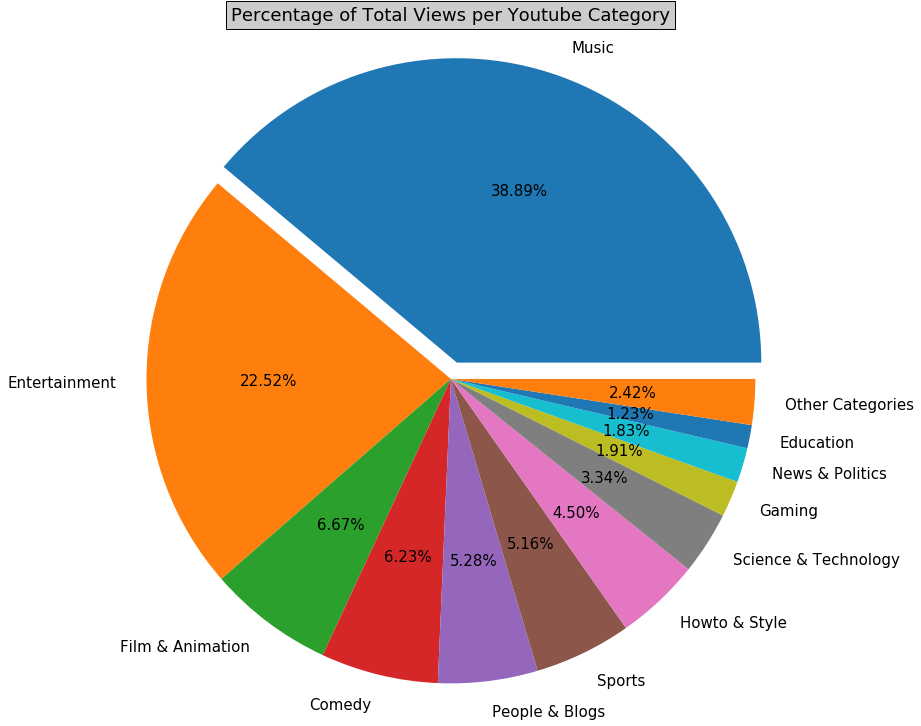

In [5]:
# Key to show what each category id refers to
category_key = {1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 
                17: 'Sports', 19: 'Travel & Events', 20: 'Gaming', 22: 'People & Blogs', 
                23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 
                27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 43: 'Shows'}

# Calculate the number of views per category
category_views = {k:0 for k in yt_videos['category_id']}

# Sum up the total views per category
for index, row in yt_videos.iterrows():
    category_views[row['category_id']] += row['views']

# Sort the categories in descending order by view count
categories_sorted_by_total_views = sorted(category_views.items(), key=lambda x: x[1], reverse=True)

total_views = sum(x[1] for x in categories_sorted_by_total_views)

# Only include categories that make up larger than 1 percent of total views
# Combine the other categories that are less than 1 percent into an "Other" category
adjusted_categories_sorted_by_total_views = []
for i in categories_sorted_by_total_views:
    if i[1] / total_views > 0.01:
        adjusted_categories_sorted_by_total_views.append(i)

# Pop out the largest category on the pie chart. Need to add an additional entry for the Other category
explode_lst = [0]*(len(adjusted_categories_sorted_by_total_views)+1)
explode_lst[0] = 0.2

# Extract the view count from the list of tuples
view_count = [x[1] for x in adjusted_categories_sorted_by_total_views]
# Calculate the remaining views for the Other category
view_count.append(total_views-sum(view_count))

# Extract the category id from the list of tuples and convert it to its string representation
categories = [category_key[x[0]] for x in adjusted_categories_sorted_by_total_views]
categories.append('Other Categories')

# Create the Pie Chart
matplotlib.rcParams['font.size'] = 15.0
plt.pie(view_count, labels = categories, explode = explode_lst, autopct = '%.2f%%', radius = 3.5)
plt.title("Percentage of Total Views per Youtube Category", pad=250, bbox={'facecolor':'0.8', 'pad':5})
plt.show()

===== EDA: Find most frequent video categories by number of videos =====

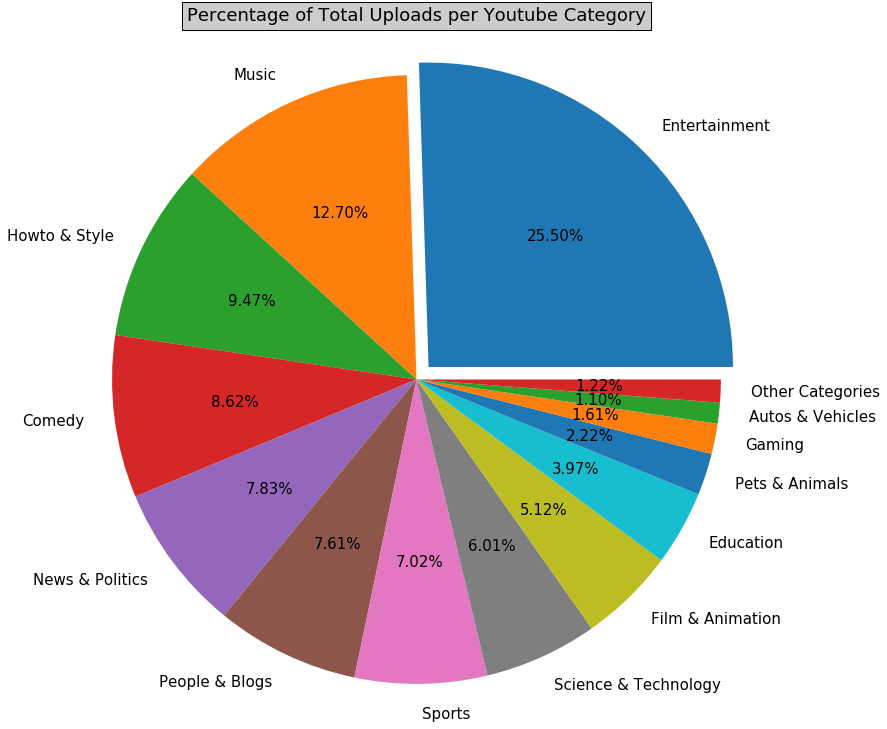

In [6]:
# Calculate the number of uploads per category
category_video_uploads = {k:0 for k in yt_videos['category_id']}

# Count the number of video uploads per category
for index, row in yt_videos.iterrows():
    category_video_uploads[row['category_id']] += 1
    
# Sort the categories in descending order by video upload count
categories_sorted_by_num_uploads = sorted(category_video_uploads.items(), key=lambda x: x[1], reverse=True)

# Only include categories that make up larger than 1 percent of total uploads
# Combine the other categories that are less than 1 percent into an "Other" category
total_uploads = len(yt_videos.index)
adjusted_categories_sorted_by_total_uploads = []

for i in categories_sorted_by_num_uploads:
    if i[1] / total_uploads > 0.01:
        adjusted_categories_sorted_by_total_uploads.append(i)

# Extract the upload count from the list of tuples
upload_count = [x[1] for x in adjusted_categories_sorted_by_total_uploads]
upload_count.append(len(yt_videos.index) - sum(upload_count))

# Extract the category id from the list of tuples and convert it to its string representation
categories = [category_key[x[0]] for x in adjusted_categories_sorted_by_total_uploads]
categories.append('Other Categories')

# Pop out the largest category on the pie chart. Need to add an additional entry for the Other category
explode_lst = [0]*(len(adjusted_categories_sorted_by_total_uploads)+1)
explode_lst[0] = 0.2

# Create the Pie Chart
plt.pie(upload_count, labels = categories, explode = explode_lst, autopct = '%.2f%%', radius = 3.5)
plt.title("Percentage of Total Uploads per Youtube Category", pad=250, bbox={'facecolor':'0.8', 'pad':5})
plt.show()  

==== EDA: Calculate average views per video per category =====

[(10, 6055450.527707809), (1, 2578967.653125), (29, 2366887.769230769), (20, 2340437.504950495), (24, 1745655.6990595611), (2, 1489990.4057971016), (17, 1452265.0797266515), (23, 1429562.0352504638), (22, 1371891.9621848739), (28, 1099892.045212766), (19, 996254.033898305), (26, 940335.8564189189), (43, 762400.0), (15, 749538.8776978417), (27, 614973.625), (25, 462341.71428571426)]


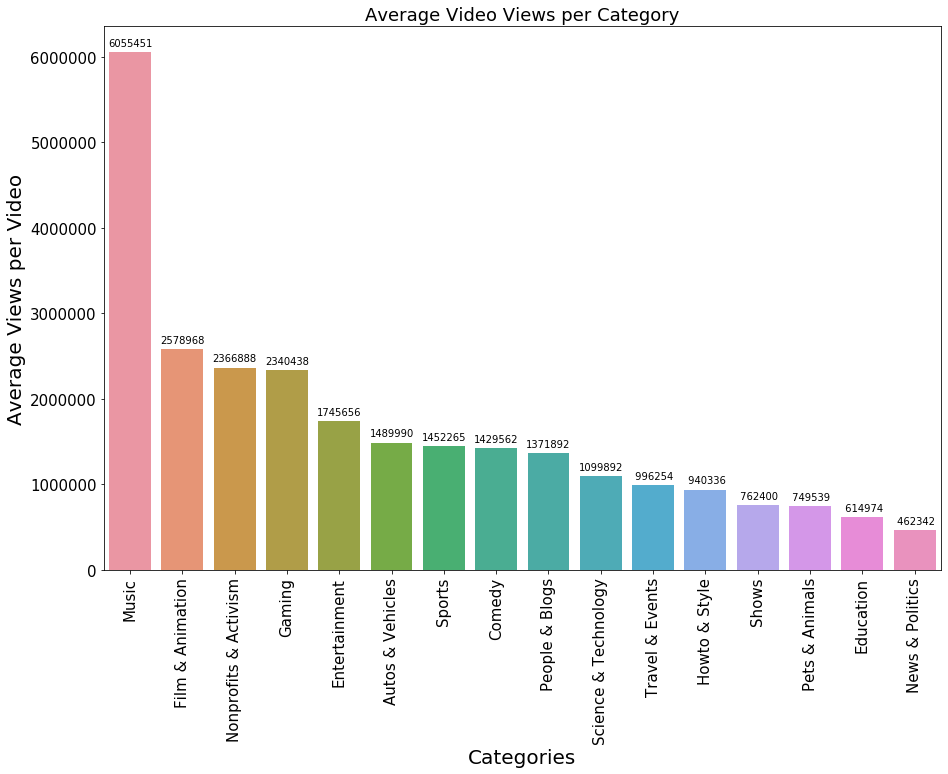

In [90]:
avg_views_per_video_by_category = {k: v / category_video_uploads[k] for k,v in category_views.items() if k in category_video_uploads}

# Sort the categories in descending order by average views per video
categories_sorted_by_views_per_video = sorted(avg_views_per_video_by_category.items(), key=lambda x: x[1], reverse=True)


print(categories_sorted_by_views_per_video)

# Create a dataframe from the dictionary 
views_df = pd.DataFrame(columns=['category', 'views'])
views_df['category'] = [category_key[x[0]] for x in categories_sorted_by_views_per_video]
views_df['views'] = [x[1] for x in categories_sorted_by_views_per_video]

# Plot the graph
plt.figure(figsize=(15,10))
splot = sns.barplot(x="category",y="views",data=views_df)

# Set the title and axis labels
splot.set_title("Average Video Views per Category")
splot.set_xlabel('Categories',fontsize = 20)
splot.set_ylabel('Average Views per Video',fontsize = 20 )

# Rotate the x labels 90 degrees
splot.set_xticklabels(splot.get_xticklabels(), rotation=90)    

# Add value annotations above each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '7.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   fontsize = 10,
                   textcoords = 'offset points')

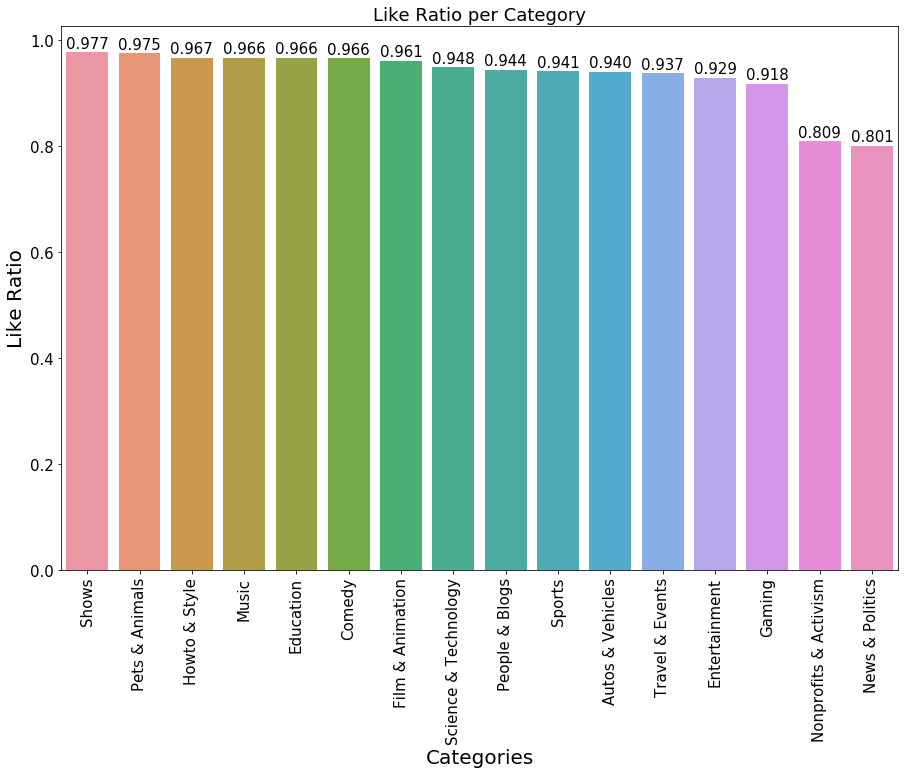

In [84]:
# Add a like ratio column to the dataframe
like_ratio = []
for index, row in yt_videos.iterrows():
    divisor = row['likes'] + row['dislikes']
    
    # Handle instances of no likes and dislikes by setting it equal to -1
    if divisor > 0:
        like_ratio.append(row['likes']/divisor)
    else:
        like_ratio.append(-1)
    
yt_videos['like_ratio'] = like_ratio

# Calculate the average like ratio for each category
like_ratio_by_category = {k: [0,0] for k in yt_videos['category_id']}

# Calculate the like ratio by summing all likes per category and dividing by likes and dislikes
for index, row in yt_videos.iterrows():
    like_ratio_by_category[row['category_id']][0] += row['likes']
    like_ratio_by_category[row['category_id']][1] += row['dislikes'] 
    
for k, v in like_ratio_by_category.items():    
    like_ratio_by_category[k].append(v[0]/(v[0]+v[1]))

# Sort the categories in descending order by average views per video
categories_sorted_by_like_ratio = sorted(like_ratio_by_category.items(), key=lambda x: x[1][2], reverse=True)

# Organize the data for the bar chart into a new dictionary
like_ratio_dict = {category_key[x[0]]:x[1][2] for x in categories_sorted_by_like_ratio}

# Create a dataframe from the dictionary 
like_ratio_df = pd.DataFrame(columns=['category', 'like_ratio'])
like_ratio_df['category'] = [k for k in like_ratio_dict.keys()]
like_ratio_df['like_ratio'] = [v for v in like_ratio_dict.values()]

# Plot the graph
plt.figure(figsize=(15,10))
splot = sns.barplot(x="category",y="like_ratio",data=like_ratio_df)

# Set the title and axis labels
splot.set_title("Like Ratio per Category")
splot.set_xlabel('Categories',fontsize = 20)
splot.set_ylabel('Like Ratio',fontsize = 20 )

# Rotate the x labels 90 degrees
splot.set_xticklabels(splot.get_xticklabels(), rotation=90)    

# Add value annotations above each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


===== EDA: Plot Time series chart of all views =====

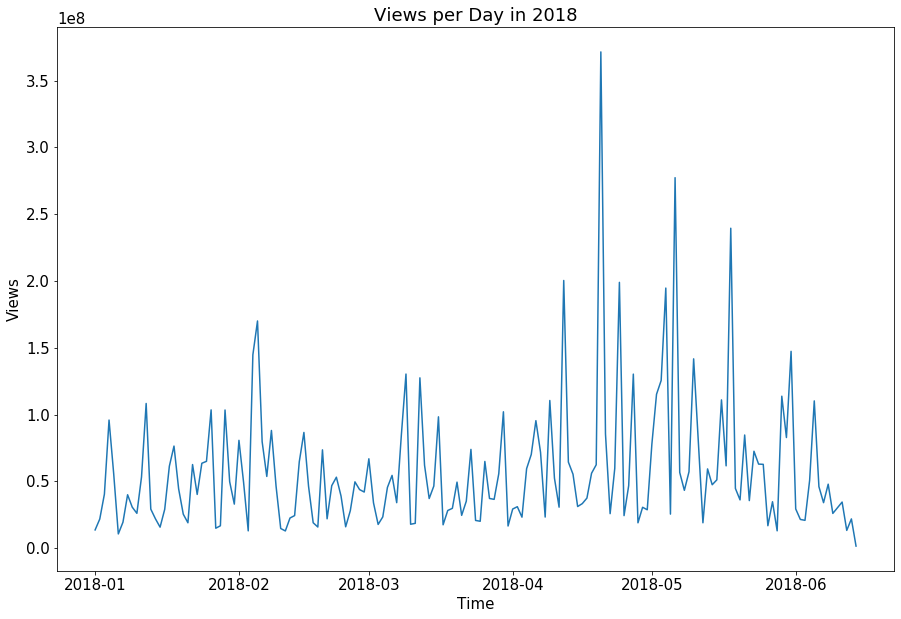

In [9]:
# Create a new column for publish date
publish_date = []

for index, row in yt_videos.iterrows():
    # Extract the date from the date-time object using regex
    date = re.search(r"[0-9]{4}-[0-9]{2}-[0-9]{2}", row['publish_time'])
    publish_date.append(date.group())

# Add the new date column
yt_videos['publish_date'] = publish_date

# Convert the new date column to a datetime object
yt_videos['publish_date'] = pd.to_datetime(yt_videos['publish_date'])

# Sort the dataframe in ascending order by datetime
yt_videos = yt_videos.sort_values(by='publish_date')

views_per_day = {k:0 for k in yt_videos['publish_date']}
cutoff_date = datetime.datetime(2018,1,1)

# Only tally views on days that come on or after January 1, 2018
# This is because most of the data occurs in 2018
for index, row in yt_videos.iterrows():
    if row['publish_date'] >= cutoff_date:
        views_per_day[row['publish_date']] += row['views']

# Only consider views that are greater than zero
dates = [k for k,v in views_per_day.items() if v > 0] 
views = [v for k,v in views_per_day.items() if v > 0] 

# Draw the Time Series Plot
plt.figure(figsize=(15,10))
plt.plot(dates, views)
plt.xlabel("Time")
plt.title("Views per Day in 2018", )
plt.ylabel("Views")
plt.show()

===== EDA: Determine the average time it takes for videos to trend =====
On average, it takes a youtube video roughly 8 days to trend since the day it is first published.
- Can do two analyses: one with cutoff and one w/o cutoff -> can also plot as a timeseries -> can show the magical "youtube algorithm" at work recommending old videos

In [10]:
# Create a new column for the amount of days it takes for a video to trend since its publish date
yt_videos['time_to_trend'] = yt_videos['trending_date'] - yt_videos['publish_date']
yt_videos['time_to_trend'] = yt_videos['time_to_trend'].dt.days

# Only want to sum videos that were released after 11-08-2017 since there are many outliers before this date
trend_cutoff_date = datetime.datetime(2017,11,8)

# Calculate the average trend time but summing time to trend divided by the number of data points
avg_time_to_trend = yt_videos.loc[yt_videos['publish_date'] > trend_cutoff_date, 'time_to_trend'].sum()
num_data_points = len(yt_videos[yt_videos['publish_date'] > trend_cutoff_date])

print(avg_time_to_trend/num_data_points)
yt_videos

8.011082138200782


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_ratio,publish_date,time_to_trend
16294,MJO3FmmFuh4,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23T08:24:11.000Z,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,False,False,False,"Original Whazzup ad - however, there is a litt...",0.751227,2006-07-23,4215
11375,UQtt9I6c-YM,2018-01-09,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,2008-04-05T18:22:40.000Z,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,0.884615,2008-04-05,3566
2979,wFEAoF7RC7Y,2017-11-28,Behind The Sounds: That's Not Me,BehindTheSounds,10,2008-06-17T00:07:56.000Z,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86897,469,4,106,https://i.ytimg.com/vi/wFEAoF7RC7Y/default.jpg,False,False,False,A video detailing the creative process behind ...,0.991543,2008-06-17,3451
2994,Y8JGfi4MJ8k,2017-11-28,SAOIRSE RONAN - MORONIC (IRONIC),flirppy242,10,2008-08-07T12:16:58.000Z,"SAOIRSE|""RONAN""|""MORONIC""|""IRONIC""|""IZZIE""|""CO...",26830,79,1,8,https://i.ytimg.com/vi/Y8JGfi4MJ8k/default.jpg,False,False,False,EL NOVIO DE MI MADRE\r\nI COULD NEVER BE A WOMAN,0.987500,2008-08-07,3400
1364,rO_mAQC9bv0,2017-11-20,Amazon.com commercial Xmas 1999Magnetic Whale Art,astroboy1960,1,2009-03-10T00:27:20.000Z,"amazon|""commerical""|""y2k""|""sing""|""along""|""mitc...",15476,34,1,10,https://i.ytimg.com/vi/rO_mAQC9bv0/default.jpg,False,False,False,IMHO the best of Amazon's Christmas 1999 ads. ...,0.971429,2009-03-10,3177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,2018-06-13T18:00:32.000Z,"mcdonalds|""big mac""|""fancy""|""fast food""|""jacqu...",402418,10070,3303,2142,https://i.ytimg.com/vi/Gi56dSh8Fq8/default.jpg,False,False,False,"It's your good ol' McDonald's Big Mac, but lik...",0.753010,2018-06-13,1
40761,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13T15:06:08.000Z,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,https://i.ytimg.com/vi/JGm9Y_hFqNk/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...,0.960105,2018-06-13,1
40762,6h8QgZF5Qu4,2018-06-14,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,24,2018-06-13T05:27:27.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,https://i.ytimg.com/vi/6h8QgZF5Qu4/default.jpg,False,False,False,James Corden and Ashton Kutcher square off in ...,0.979230,2018-06-13,1
40749,-QPdRfqTnt4,2018-06-14,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13T07:00:00.000Z,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burton’s all-...,0.945946,2018-06-13,1


===== Prepare Data for Test and Train =====

In [11]:
# Split data into an 80/20 split of training and testing data
num_data_points = len(yt_videos.index)

# Use views, likes, dislikes, and comment_count as the features
X_train = yt_videos[['likes', 'dislikes', 'comment_count', 'category_id', 'like_ratio']][:int(0.8*num_data_points)]
y_train = list(yt_videos['views'][:int(0.8*num_data_points)])

X_test = yt_videos[['likes', 'dislikes', 'comment_count', 'category_id', 'like_ratio']][int(0.8*num_data_points):]
y_test = list(yt_videos['views'][int(0.8*num_data_points):])

# X = yt_videos[['likes', 'dislikes', 'comment_count', 'category_id']]
# y = yt_videos['views']

===== Train the Regression Tree =====

In [12]:
# TRY LINEAR REGRESSION
lin_reg = LinearRegression().fit(X_train, y_train)

====== Test and Evaluate the Model's Performance =====

0.7255457141890984
[ 3.23446734e+01  7.74820251e+01 -9.28923089e+01 -1.14465823e+04
 -1.19843379e+06]
                  0
count  1.251000e+03
mean   1.167675e+06
std    6.414033e+06
min   -3.293089e+07
25%   -2.210347e+05
50%    1.466651e+05
75%    8.481648e+05
max    9.133203e+07


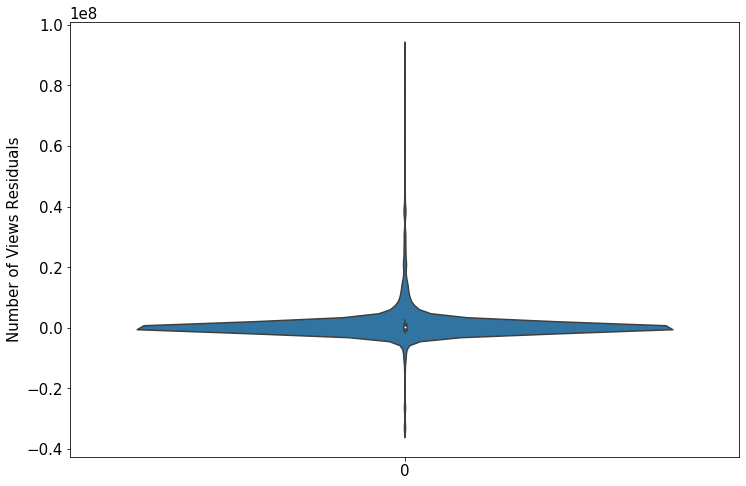

In [13]:
# Print the R squared value
print(lin_reg.score(X_test, y_test))

print(lin_reg.coef_)

# Calculate the residual values of the actual vs predicted values
y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred

# Make the violin plot of the residual values
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax = sns.violinplot(data=residuals)
ax.set(ylabel='Number of Views Residuals')

# Print descriptive Statistics
df_describe = pd.DataFrame(residuals).describe()
print(df_describe)

[ 3.23446734e+01  7.74820251e+01 -9.28923089e+01 -1.14465823e+04
 -1.19843379e+06]
0.7255457141890984
                  0
count  1.251000e+03
mean   1.167675e+06
std    6.414033e+06
min   -3.293089e+07
25%   -2.210347e+05
50%    1.466651e+05
75%    8.481648e+05
max    9.133203e+07


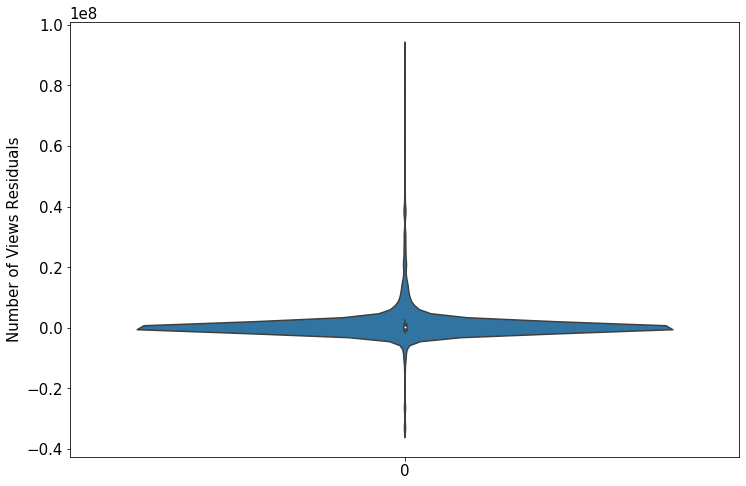

In [14]:
like_comment_interaction = []

# for index, row in X_train.iterrows():
#     like_comment_interaction.append(row['likes']/(row['dislikes'] + row['likes']))
#     like_comment_interaction.append(row['likes'] * row['comment_count'])
# X_train['comment_like_interaction'] = like_comment_interaction

lin_reg_interaction_terms = LinearRegression().fit(X_train, y_train)
print(lin_reg_interaction_terms.coef_)


# like_comment_interaction = []
# for index, row in X_test.iterrows():
#     like_comment_interaction.append(row['likes']/(row['dislikes'] + row['likes']))
# #     like_comment_interaction.append(row['likes'] * row['comment_count'])
    
# X_test['comment_like_interaction'] = like_comment_interaction

print(lin_reg_interaction_terms.score(X_test, y_test))

# Calculate the residual values of the actual vs predicted values
y_pred = lin_reg_interaction_terms.predict(X_test)
residuals = y_test - y_pred


# Make the violin plot of the residual values
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax = sns.violinplot(data=residuals)
ax.set(ylabel='Number of Views Residuals')

# Print descriptive Statistics
df_describe = pd.DataFrame(residuals).describe()
print(df_describe)

# Try Multiple Logistic Regression??